### Preindex ### 
* Read 5 letter words from MacOS system dictionary

In [1]:
dict_file = '/usr/share/dict/words'
word_len = 5
with open(dict_file, 'r') as file:
    d = [line.strip() for line in file.readlines() if line.islower() and len(line) == word_len+1]
print("%d entries in dictionary" % len(d))

8497 entries in dictionary


In [2]:
# return a flag for each character: 1 for correct, None for absent, 0 for present in the wrong position
def evaluate(word, guess):
    assert(len(word) == len(guess))
    ans = []
    word_set = [c for c in word]    
    for (w, g) in zip(word, guess):
        if w==g:
            ans.append(1)
            word_set.remove(g)
        elif g not in word:
            ans.append(None)
        else:
            ans.append(0)
    for i, e in enumerate(ans):
        if e == 0:
            if guess[i] in word_set:
                word_set.remove(guess[i])
            else:
                ans[i] = None
    
    return ans

def is_correct(ans):
    return all([x == 1 for x in ans])

In [3]:
ans = evaluate('soale', 'abbot')
print(ans)
print(is_correct(ans))
ans = evaluate('acari', 'acara')
print(ans)
print(is_correct(ans))


[0, None, None, 0, None]
False
[1, 1, 1, 1, None]
False


In [4]:
import re
# get all possible words that match our scratchpad
def get_candidates(pad, dictionary):
    # convert scratchpad to a regexp 
    regxp = ''
    for p in pad:
        regxp += ('[' + ''.join(p) + ']')

    words = []
    for word in dictionary:
        if re.match(regxp, word):
            words.append(word)

    return words

In [5]:
from collections import defaultdict
import heapq

# Given a set of candidate words, this ranks and returns the one with the highest 'score'.
# The score for a word is the sum of scores for each letter. for a letter l at position p, 
# the score is how often l occurs at position p across all words in the candidate set.
def get_best_candidate(words):
    c = defaultdict(int)
    for word in words:
        for (i, e) in enumerate(word):
            c[(i, e)] += 1

    h = []    
    for word in words:
        score = 0
        for (i, e) in enumerate(word):
            score += c[(i, e)]   
        heapq.heappush(h, (-score, word))

    return h[0][1]

In [6]:
def solve(word, start_word):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    # a 'scratchpad' that keeps all the possible letters for each position
    pad = [set(alphabet) for i in range(word_len)]
    # print(pad)

    guess = start_word
    attempts = 0
    while True:
        attempts += 1 
        ans = evaluate(word, guess)
        # print(guess, ans)
        if is_correct(ans):
            return attempts
            print('word is %s after %d attempts' % (guess, attempts))
            break 

        seen = set()
        # adjust our scratchpad based on answers
        for (i, e) in enumerate(ans):
            if e == 1:
                pad[i] = set(guess[i])
                seen.add(guess[i])
            elif e == 0:
                pad[i].discard(guess[i])
                seen.add(guess[i])
            else: #none
                if guess[i] in seen:
                    pad[i].discard(guess[i])
                else:
                    for p in pad: 
                        p.discard(guess[i]) 

        #print(pad)
        words = get_candidates(pad, d)
        guess = get_best_candidate(words)
        #print(word, words, guess)


In [7]:
solve('slump', 'soare')

6

In [8]:
start_word = 'soare'
c = defaultdict(int)
i = 0
for word in d:
    i += 1
#    print(word)
    attempts = solve(word, start_word)
    c[attempts] += 1
    if i%500 == 0:
        print(c)
    if attempts > 6: 
        print(word, attempts)
print(c)

abler 9
acold 7
adrip 7
adzer 7
after 7
agape 7
agger 8
aglow 7
agony 7
amelu 7
amhar 7
amino 7
among 7
angle 7
angor 7
ankle 7
anvil 7
apart 7
aping 7
argue 7
armer 9
arsle 8
arson 7
arvel 7
asale 7
ascan 7
defaultdict(<class 'int'>, {4: 137, 5: 212, 6: 98, 3: 26, 9: 2, 7: 22, 8: 2, 2: 1})
asoka 7
asper 8
aspic 7
astir 7
athar 8
atmid 7
atoll 7
atone 7
atony 7
atter 8
auger 9
aweto 7
axial 7
axled 7
axman 7
ayous 7
badly 7
baffy 7
baker 7
baler 7
banya 7
barer 8
bejan 7
belah 7
bemix 7
bepaw 7
betag 7
bezel 7
bichy 7
bifer 8
biose 7
birsy 7
biter 7
defaultdict(<class 'int'>, {4: 275, 5: 396, 6: 212, 3: 57, 9: 3, 7: 49, 8: 7, 2: 1})
bonny 7
boosy 7
booty 7
boozy 8
bosky 8
boxer 7
boyer 8
buffy 7
buggy 8
bully 7
bursa 7
butty 9
buzzy 9
caker 7
caoba 7
caper 8
capsa 7
carer 9
cargo 7
carol 7
carom 7
caser 10
casha 7
caste 7
cauda 7
cawky 7
chary 7
defaultdict(<class 'int'>, {4: 436, 5: 581, 6: 276, 3: 113, 9: 6, 7: 67, 8: 12, 2: 8, 10: 1})
cicer 7
cider 7
citer 8
civvy 8
clear 7
cloth 7


<BarContainer object of 12 artists>

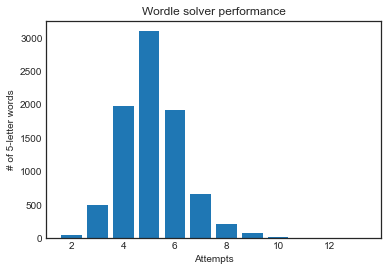

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
plt.title('Wordle solver performance')
plt.xlabel('Attempts')
plt.ylabel('# of 5-letter words')
plt.bar(c.keys(), c.values())
